In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [4]:
# copy demo into current directory
ac.copydemo('ppp')

# start AUTO with runner object
runner = ra.runAUTO()

pgm = "ppp"
print("\nDemo %s is started"%pgm)
print("\n%s : first run : stationary solutions"%pgm)
ppp = ac.run(e=pgm,c=pgm,runner=runner)

print("\n%s : second run : periodic solutions"%pgm)
ppp = ppp + ac.run(ppp("HB2"),IPS=2,ICP=[1,11],ILP=0,NMX=15,NPR=50,DS=0.1,DSMAX=0.5,runner=runner)
ac.save(ppp,'ppp')

print("\n%s : third run : compute Hopf bifurcation curves"%pgm)
hb = ac.run(ppp("HB2"),ICP=[1,4],ILP=0,ISW=2,NMX=100,RL1=0.58,DSMAX=0.1,runner=runner)
ac.save(hb,'hb')

Copying demo ppp ... done

Demo ppp is started

ppp : first run : stationary solutions
gfortran -fopenmp -O -c ppp.f90 -o ppp.o
gfortran -fopenmp -O ppp.o -o ppp.exe /auto/lib/*.o
Starting ppp ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)     
   1     1  EP    1   0.00000E+00   1.00000E+00   1.00000E+00   0.00000E+00   0.00000E+00
   1    29  BP    2   5.50000E-01   1.00000E+00   1.00000E+00   0.00000E+00   0.00000E+00
   1    32  UZ    3   6.00000E-01   1.00000E+00   1.00000E+00   0.00000E+00   0.00000E+00

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)     
   2    14  LP    4   5.64596E-01   1.21783E+00   1.21571E+00  -7.19022E-02   0.00000E+00
   2    55  EP    5   4.50010E-01   2.01134E+00   1.98439E+00  -3.28131E-01   0.00000E+00

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)     
   2    31  BP    6   3.68452E-01   5.27022E-01   4.99971E-01   1.66676E-01  

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Saving to b.ppp, s.ppp, and d.ppp ... done

ppp : third run : compute Hopf bifurcation curves
Starting ppp ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)        PAR(4)     
   8    34  BP   13   3.62537E-01   4.72458E-01   4.42085E-01   1.66667E-01  -1.23855E-23   3.34749E+00
   8    52  EP   14   5.82387E-01   5.26566E-01   5.17404E-01   9.78014E-02  -3.84530E-24   4.93445E+00

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)        PAR(4)     
   9    58  GH   15   4.98748E-01   4.05424E-01   2.51694E-01   1.66667E-01  -2.70630E-01   4.48984E+00
   9    80  GH   16   6.83877E-02   1.88008E-01   4.52111E-02   1.66667E-01  -7.43322E-02   5.72873E+00
   9    91  BP   17   7.72928E-02   1.91472E-01   9.42532E-02   1.66667E-01   2.76300E-06   5.43448E+00
   9   100  EP   18   1.32140E-01   2.57730E-01   1.84428E-01   1.66667E-01   6.80703E-02   4.89343E+00

  BR    PT  TY  LAB    PAR(1)        L2-NORM        

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Created plot


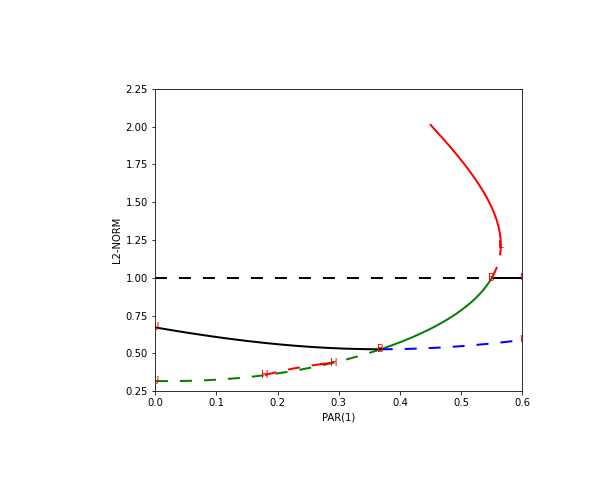

In [5]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('ppp')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

Created plot


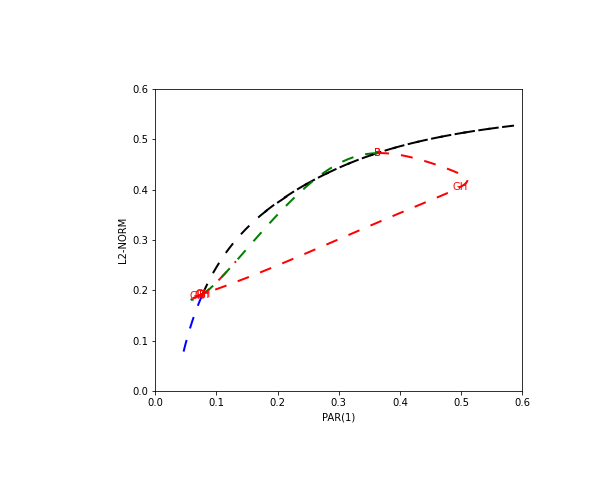

In [6]:
# plot Hopf bifurcation curves
p = ac.plot('hb')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [7]:
# clean up files

ac.clean()
ac.delete('ppp')
ac.delete('hb')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.ppp ... done
Deleting s.ppp ... done
Deleting d.ppp ... done
